In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')

Mounted at /content/drive/


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

In [3]:
file_path = '\DataScience_Final\Housing.csv'
df = pd.read_csv(file_path)

In [33]:
# Data Preprocessing
print(df.isnull().sum())

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64


In [34]:
# Filling missing values for numeric columns with median
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

<ipython-input-34-df25ba5353c5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [35]:
# Filling missing values for categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-6-5b69c8d0b830>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [36]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [37]:
# Checking the cleaned DataFrame structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_yes                     545 non-null    bool 
 7   guestroom_yes                    545 non-null    bool 
 8   basement_yes                     545 non-null    bool 
 9   hotwaterheating_yes              545 non-null    bool 
 10  airconditioning_yes              545 non-null    bool 
 11  prefarea_yes                     545 non-null    bool 
 12  furnishingstatus_semi-furnished  545 non-null    b

In [38]:
# Defining features and target variable
X = df.drop('price', axis=1)
y = df['price']

In [39]:
# Keeping X as a DataFrame for feature selection later
X_df = X.copy()

In [40]:
# Converting to float32 for TensorFlow compatibility
X = X.values.astype(np.float32)
y = y.values.astype(np.float32)

In [41]:
# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# 1. Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [43]:
# Evaluating Linear Regression Model
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression - MAE: {mae_linear}, MSE: {mse_linear}, R^2: {r2_linear}')

Linear Regression - MAE: 970043.25, MSE: 1754318372864.0, R^2: 0.6529242992401123


In [44]:
# 2. Polynomial Regression
poly_features = PolynomialFeatures(degree=2)  # Adjust degree as needed
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)


In [45]:
# Evaluating Polynomial Regression Model
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [46]:
print(f'Polynomial Regression - MAE: {mae_poly}, MSE: {mse_poly}, R^2: {r2_poly}')

Polynomial Regression - MAE: 1001685.875, MSE: 1740096405504.0, R^2: 0.6557379961013794


In [47]:
# 3. Feature Selection using RFE
selector = RFE(linear_model, n_features_to_select=5)  # Select top 5 features
selector.fit(X_train, y_train)
selected_features = X_df.columns[selector.support_]  # Use X_df to get column names

print("Selected Features:", selected_features)

Selected Features: Index(['bathrooms', 'mainroad_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes'],
      dtype='object')


In [48]:
# 4. K-Means Clustering
features_for_clustering = df[['area', 'bedrooms', 'bathrooms']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_for_clustering)
    wcss.append(kmeans.inertia_)

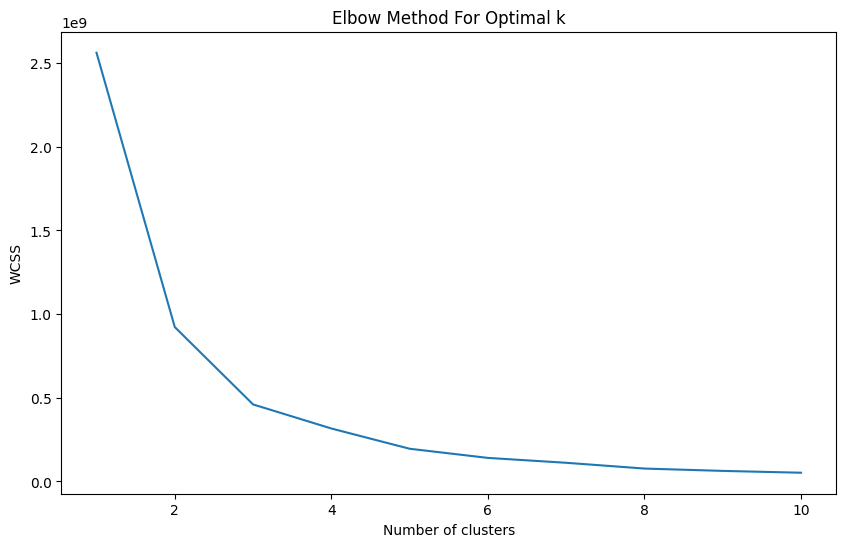

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_for_clustering)


In [51]:
print(df.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  \
0          True                            Fal

In [52]:
# Baseline Model - KNN Regressor Example (as a simple algorithm)
knn_model = KNeighborsRegressor(n_neighbors=3)  # Adjust neighbors as needed
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [53]:
# Evaluating KNN Model Performance
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

In [54]:
print(f'KNN Regressor - MAE: {mae_knn}, MSE: {mse_knn}, R^2: {r2_knn}')

KNN Regressor - MAE: 1364903.625, MSE: 3536946200576.0, R^2: 0.3002479076385498


In [55]:
# Parameter Analysis for KNN (finding best k)
neighbors_range = range(1, 21)  # Test k from 1 to 20
scores = []
for k in neighbors_range:
    knn_model_k = KNeighborsRegressor(n_neighbors=k)
    knn_model_k.fit(X_train, y_train)
    scores.append(knn_model_k.score(X_test, y_test))

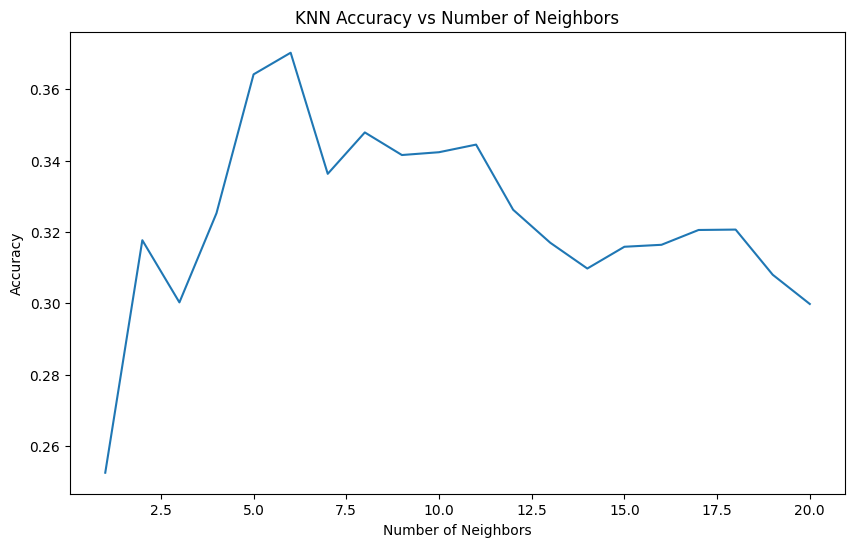

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, scores)
plt.title('KNN Accuracy vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [57]:
# Neural Network Implementation
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
# Training the model on training data
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

In [59]:
# Predicting on test set using ANN model
y_pred_ann = model.predict(X_test).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [60]:
# Evaluating ANN model performance
mse_ann = mean_squared_error(y_test, y_pred_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)


In [61]:
print(f'ANN - Mean Absolute Error: {mae_ann}')
print(f'ANN - Mean Squared Error: {mse_ann}')
print(f'ANN - R-squared: {r2_ann}')

ANN - Mean Absolute Error: 1589852.375
ANN - Mean Squared Error: 4146029920256.0
ANN - R-squared: 0.1797463297843933


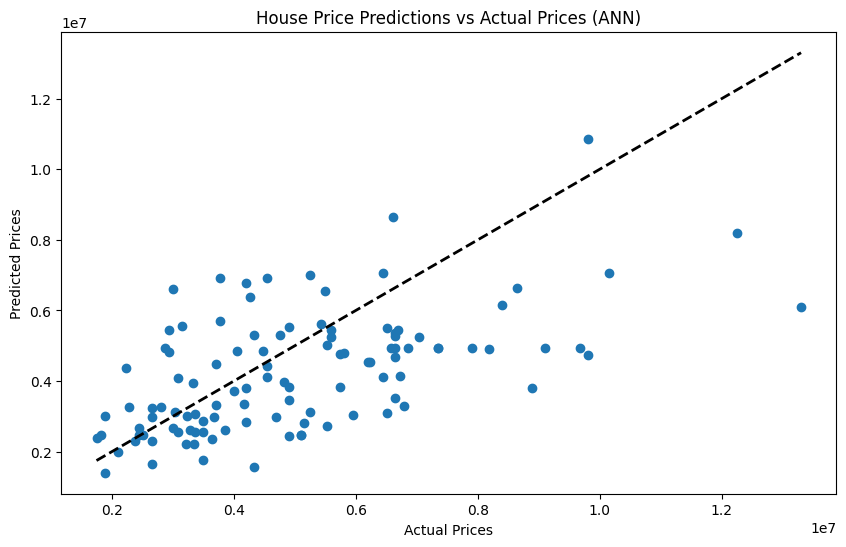

In [62]:
# Visualizing ANN results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ann)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Identity line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('House Price Predictions vs Actual Prices (ANN)')
plt.show()

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

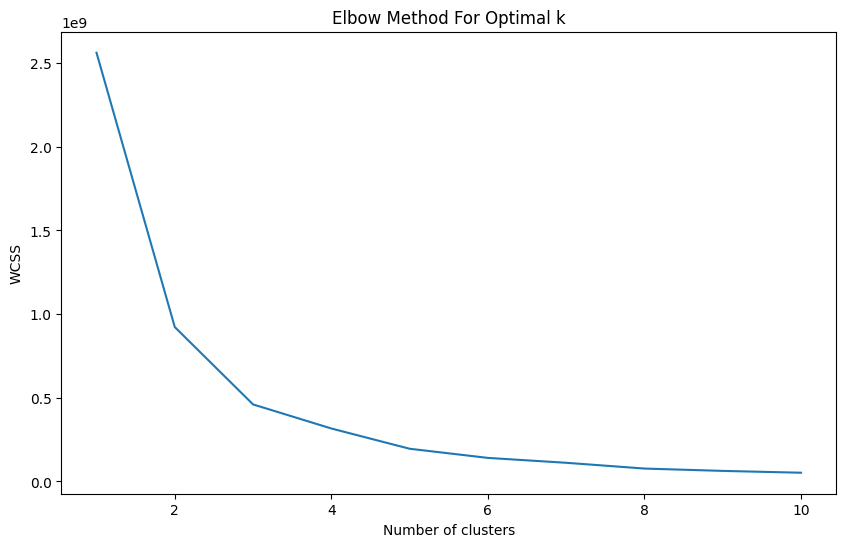

In [71]:
# 4. K-Means Clustering
features_for_clustering = df[['area', 'bedrooms', 'bathrooms']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_for_clustering)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [72]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_for_clustering)

# Classification Example
# Prepare data for classification
df['Price_Category'] = np.where(df['price'] > df['price'].median(), 1, 0)  # 1: Expensive, 0: Cheap

X_class = df.drop(['price', 'Price_Category', 'Cluster'], axis=1)  # Exclude target and other non-feature columns
y_class = df['Price_Category']

# Split data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_class, y_train_class)

# Predict and evaluate
y_pred_class = logistic_model.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Logistic Regression Accuracy: {accuracy}')
print(classification_report(y_test_class, y_pred_class))  # Add closing parenthesis here


Logistic Regression Accuracy: 0.8532110091743119
              precision    recall  f1-score   support

           0       0.80      0.92      0.85        51
           1       0.92      0.79      0.85        58

    accuracy                           0.85       109
   macro avg       0.86      0.86      0.85       109
weighted avg       0.86      0.85      0.85       109



In [76]:
# Predict and evaluate
from sklearn.metrics import accuracy_score, classification_report, f1_score
y_pred_class = logistic_model.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)  # Calculate F1-score

print(f'Logistic Regression Accuracy: {accuracy}')
print(f'Logistic Regression F1-Score: {f1}')
print(classification_report(y_test_class, y_pred_class))

Logistic Regression Accuracy: 0.8532110091743119
Logistic Regression F1-Score: 0.8518518518518519
              precision    recall  f1-score   support

           0       0.80      0.92      0.85        51
           1       0.92      0.79      0.85        58

    accuracy                           0.85       109
   macro avg       0.86      0.86      0.85       109
weighted avg       0.86      0.85      0.85       109



Analysis Questions:
1. What factors most significantly impact house prices?
2. Can we improve predictions using polynomial regression or neural networks?
3. How do different features correlate with house prices?


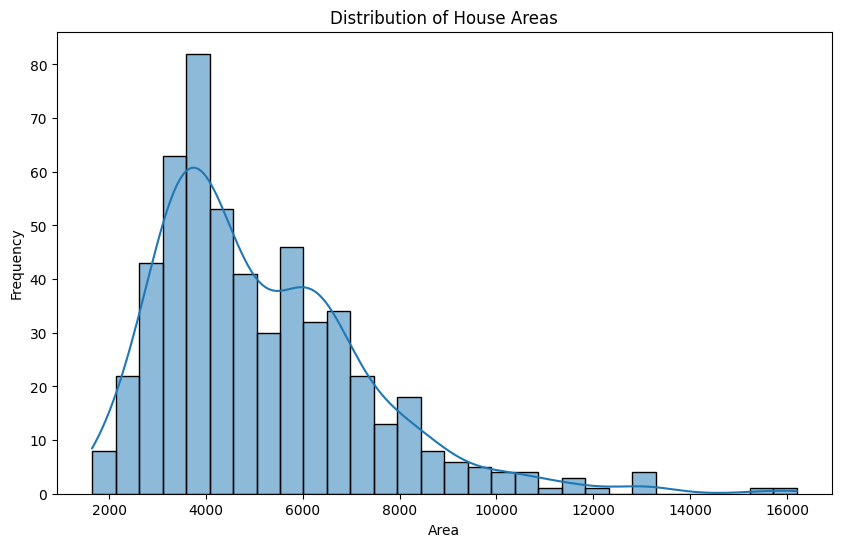

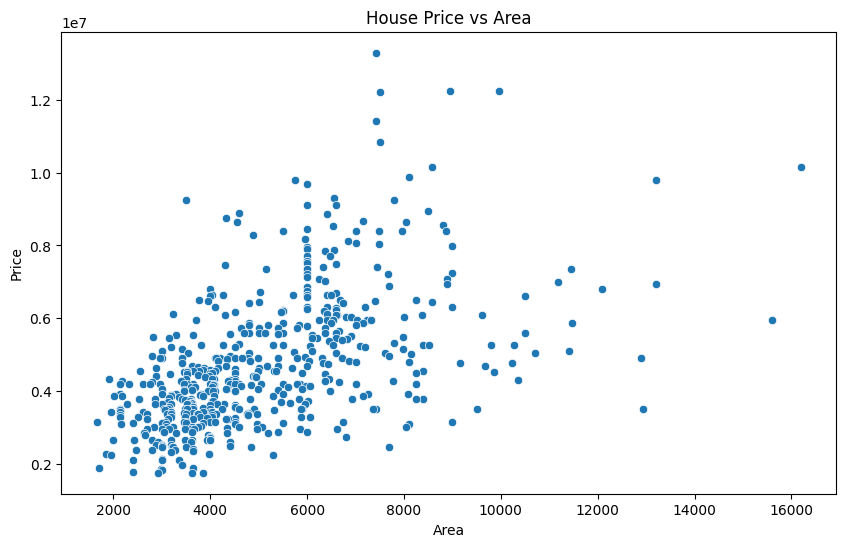

In [63]:
# Introduction
# Define the problem or questions to analyze
questions = [
    "1. What factors most significantly impact house prices?",
    "2. Can we improve predictions using polynomial regression or neural networks?",
    "3. How do different features correlate with house prices?"
]

print("Analysis Questions:")
for question in questions:
    print(question)

# Additional EDA
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['area'], bins=30, kde=True)
plt.title('Distribution of House Areas')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area', y='price')
plt.title('House Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()